In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
%matplotlib inline

import time
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math

from gym.envs.toy_text.frozen_lake import LEFT, RIGHT, DOWN, UP
from gym.envs.toy_text import frozen_lake, discrete

import gym
from gym.envs.registration import register

register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False})


""" 
    env: gym.core.Environment
    Environment to play on.

    env.P: dictionary
    It is from gym.core.Environment
    P[state][action] is tuples with (probability, nextstate, reward, terminal)
    
    env.nS: int
    count of states 
    
    env.nA: int
    count of actions available
    
    action_space: discrete
                LEFT = 0
                DOWN = 1
                RIGHT = 2
                UP = 3
    ENVIRONMENT: 
                "SFFF",
                "FHFH",
                "FFFH",
                "HFFG"
"""

def print_policy(policy, action_names):
    """ 
    Print the policy in human-readable format.
    """
    str_policy = policy.astype('str')
    for action_num, action_name in action_names.items():
        np.place(str_policy, policy == action_num, action_name)

    print(str_policy[0:4])
    print(str_policy[4:8])
    print(str_policy[8:12])
    print(str_policy[12:16])
    
    return str_policy

action_names = {LEFT: 'LEFT', RIGHT: 'RIGHT', DOWN: 'DOWN', UP: 'UP'}

In [2]:
env = gym.make('D4x4-FrozenLake-v0')
grid = 4
gamma = 0.9 # Change this to play with it


Doing Value Iteration
Total time taken: 0.025965452194213867
Total Value Iteration Steps: 43
Policy:
['DOWN' 'RIGHT' 'DOWN' 'LEFT']
['DOWN' 'LEFT' 'DOWN' 'LEFT']
['RIGHT' 'DOWN' 'DOWN' 'LEFT']
['LEFT' 'RIGHT' 'RIGHT' 'LEFT']


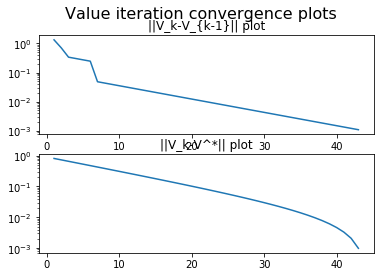

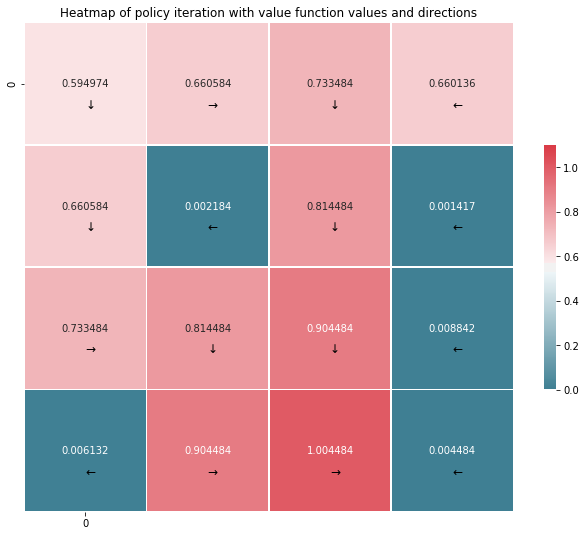

In [3]:
########################################################################
######################### Value iteration ##############################
########################################################################


def value_iteration(env, gamma, max_iterations=int(1e3), tol=1e-3):
    """
    Runs value iteration for a given gamma and environment. Return 
    the value function and the number of iterations it took to converge.
        See section 4.4 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    value_func_old = np.random.rand(env.nS)
    value_func_new = np.zeros(env.nS)
    value_func_collect = np.zeros((env.nS,max_iterations))
    delta_collect = np.zeros(max_iterations)

    for iteration in range(max_iterations):
        delta=0
        for s in range(env.nS):
            max_value_func = -1
            
            # Refer Figure 4.5 for the algorithm
            # Parse through env.nA for finding the maximum
            # Using env.P[s][a] implement the V(s) updation
                                
            # Enter your code here
            
            ## Hint: Start with using for loops accessing 
            ## the actions and next states 
            ## via env.nA and env.P[s][a] respectively
            
            # Few code compatibility instructions:
            ### Updated V(s) must be in variable "max_value_func"
            ### The older Value function V(s) is accessed by the variable "value_func_old"
            
            #####################################################################################
            # Initialize array to hold values for V_k+1
            value_arr = np.zeros(env.nA)
            
            # Loop over available actions for this state.
            for idx, a in enumerate(env.P[s]):
                # Extract reward and nextstate. No need to loop since this is deterministic,
                # simply extract the 0th element.
                reward = env.P[s][a][0][2]
                nextstate = env.P[s][a][0][1]
                
                # Assign entry in value_arr. No need to sum over action space since this
                # is deterministic.
                value_arr[idx] = reward + gamma * value_func_old[nextstate]
            
            
            # Grab the maximum from the value array.
            max_value_func = value_arr.max()
            
            #####################################################################################
            
            diff=abs(value_func_old[s]-max_value_func)
            delta=max(delta,diff)
            value_func_new[s]=max_value_func

        delta_collect[iteration] = delta
        value_func_old = value_func_new
        value_func_collect[:,iteration] = value_func_old
        # Stopping criteria: STOP when the sup norm of (V_k-V_{k-1}) is less than some tolerance level(it's 1e-3 here).
        if delta<=tol: break

    temp=np.repeat(value_func_collect[:,iteration], iteration, axis=0)
    temp=temp.reshape(16,iteration)
    temp1 = abs(value_func_collect[:,0:iteration]-temp);
    distance_from_converged_value_func = temp1.max(axis=0)

    fig = plt.figure()
    fig.suptitle("Value iteration convergence plots", fontsize=16)
    ax = plt.subplot(2,1,1)
    ax.plot(range(1,iteration+1),delta_collect[0:iteration])
    ax.set_title('||V_k-V_{k-1}|| plot')
    ax.set_yscale('log')


    ax = plt.subplot(2,1,2)
    ax.plot(range(1,iteration+1),distance_from_converged_value_func)
    ax.set_title('||V_k-V^*|| plot')
    ax.set_yscale('log')

    return value_func_new, iteration


def value_function_to_policy(env, gamma, value_function):
    """
    Mapping actions for each state using the value_function to get a policy
        See section 4.4 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    policy=np.zeros(env.nS,dtype='int')
    for s in range(env.nS):
        max_value_func=-1
        max_action=-1
        
        # Copy and paste the V(s) updation which you've implemented in the 
        # value_iteration function here. Required changes explained further:
        
        # In addition to what you did before, 
        # return action which is the best (according to maximum V(s))
        # assign that action to the variable "max_action"
        
        #####################################################################################
        # Initialize array to hold values for V_k+1
        value_arr = np.zeros(env.nA)

        # Loop over available actions for this state.
        for idx, a in enumerate(env.P[s]):
            # Extract reward and nextstate. No need to loop since this is deterministic,
            # simply extract the 0th element.
            reward = env.P[s][a][0][2]
            nextstate = env.P[s][a][0][1]

            # Assign entry in value_arr. No need to sum over action space since this
            # is deterministic.
            # NOTE: Needed to replace value_func_old with value_function.
            value_arr[idx] = reward + gamma * value_function[nextstate]


        # Grab the maximum from the value array.
        max_value_func = value_arr.max()

        # Get the action.
        max_action = np.argmax(value_arr)
        
        #####################################################################################
            
        policy[s]=max_action

    return policy


print("\nDoing Value Iteration")
start_time=time.time()
value_function,value_iters=value_iteration(env,gamma)
print("Total time taken: "+str((time.time()-start_time)))
print("Total Value Iteration Steps: "+str(value_iters))
print("Policy:")
policy=value_function_to_policy(env,gamma,value_function)
policy_str=print_policy(policy,action_names)

f, ax = plt.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
reshaped=np.reshape(value_function,(grid,grid))
seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
            square=True, xticklabels=grid+1, yticklabels=grid+1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
counter=0
for j in range(0, 4):
    for i in range(0, 4):
        if policy_str[counter]=="DOWN":
            plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
        elif policy_str[counter]=="UP":
            plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
        elif policy_str[counter]=="LEFT":
            plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
        else:
            plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
        counter=counter+1

plt.title('Heatmap of policy iteration with value function values and directions')
plt.show()

Q1. What do you infer from the convergence plots?

Answer:

The first subplot shows that the change from V_k to V_k+1 is very small by the end (on the order of 10^-3). It's clear that we have converged to within the given tolerance. Also, it's clear from the x-axis tick labels that we used less than the maximum allowed number of iterations. Since we've converged, we've found the optimal values for each state to within the specified tolerance. 


Q2. What do the numbers in the heatmap mean? (Hint: Check the code)

Answer:

The numbers are the final values for each state.


Q3. Comment on comparison of these with your answers for Policy iteration.

Answer:

The numbers here (value iteration) are equal to the numbers in the policy iteration code to within the value iteration convergence tolerance. 

In [4]:
########################################################################
#################### Final policy animation ############################
########################################################################

flag=input("\nEnter 'Y' if you want to see the final animation of the policy achieved. Else enter something else.\n")
if flag=="Y" or flag=="y": print("Final Policy Animation")
def run_policy(env,gamma,policy):
    initial_state = env.reset()
    env.render()
    current_state = initial_state
    while True:
        nextstate, reward, done, debug_info = env.step(policy[current_state])
        env.render()

        if done:
            break

        current_state=nextstate
        time.sleep(1)

if flag=="Y" or flag=="y": run_policy(env,gamma,policy)



Enter 'Y' if you want to see the final animation of the policy achieved. Else enter something else.
Y
Final Policy Animation

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
